# **Multi-Class Classification Using Multi-Layered Neural Network**

# Demonstrate working of 4-layered neural network (input layer, two hidden layers, output layer) to perform 4-class classification task.

  1. Use the training data given below. Consider each row as a two dimensional vector ([$x_1$, $x_2$]). Prepare labels ($y$) for each class.
  2. Use appropriate activation function and perform backpropagation for training.
  3. After the network is learnt, an independent test set (given below) can be used to validate the performance. (Performance can be shown through accuracy/error percentage)
  4. **Entire code should be implemented from scratch (Without using inbuilt libraries)**. You may use the standard libraries for comparison (optional).

**References:**

https://www.youtube.com/watch?v=ql7799iyXhA

https://github.com/Coding-Lane/Deep-Neural-Network-from-scratch/tree/main

## Objectives, Hypothesis and Experimental description

**Objectives:**  To demonstrate the working principle of 4 layered neural Network

**Hypothesis:** We assume that by using 4-layered Network we can build robost classification system.

**Experimental:** 
* Generate set of data of input and output.
* write code for activation function and Back-Propagation.
* Train the model and test on the independent test set.
* Build the same using Tensorflow and compare results.

## **Programming :**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
import time
import random
from tensorflow.keras.utils import to_categorical

### Training Data

In [2]:
def GenerateData(No_training,mean,variance):

  data = []
  for i in range(len(mean)):
    temp = np.random.multivariate_normal(mean[i],var[i],No_training)
    data.append(temp)

  return data

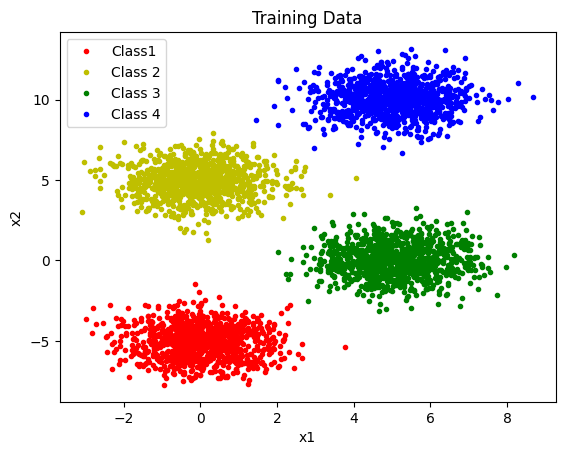

In [3]:
seed(1)
dim = 2

mean1 = np.array([0,-5])
mean2 = np.array([0,5])
mean3 = np.array([5,0])
mean4 = np.array([5,10])

mean = [mean1,mean2,mean3,mean4]

var1 = np.diag(np.ones(dim))
var = [var1,var1,var1,var1]

data = GenerateData(1000,mean,var)
data_train = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])

plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
plt.plot(data[3][:,0],data[3][:,1],'.',color='b')
plt.title("Training Data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(["Class1", "Class 2", "Class 3", "Class 4"])
plt.show()


### Testing Data

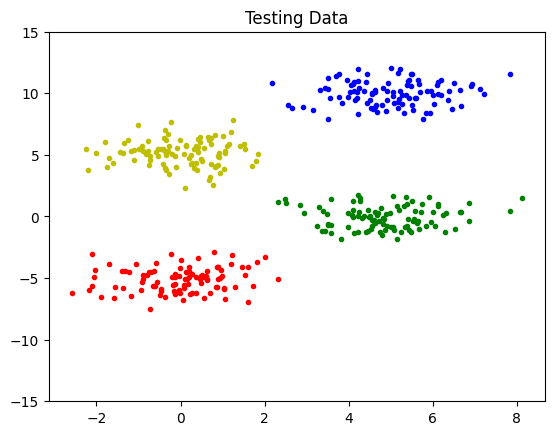

In [4]:
dim = 2

mean1 = np.array([0,-5])
mean2 = np.array([0,5])
mean3 = np.array([5,0])
mean4 = np.array([5,10])

mean = [mean1,mean2,mean3,mean4]

var1 = np.diag(np.ones(dim))
var = [var1,var1,var1,var1]

data = GenerateData(100,mean,var)
data_test = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])


plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='r')
plt.plot(data[1][:,0],data[1][:,1],'.',color='y')
plt.plot(data[2][:,0],data[2][:,1],'.',color='g')
plt.plot(data[3][:,0],data[3][:,1],'.',color='b')

plt.ylim((-15,15))
plt.title('Testing Data')
plt.show()

In [5]:
X_train = data_train.T
X_test = data_test.T
y_train = np.hstack( (np.zeros(1000),np.ones(1000),2*np.ones(1000),3*np.ones(1000)) )
y_test = np.hstack((np.zeros(100),np.ones(100),2*np.ones(100),3*np.ones(100)) )

In [6]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes=4).T
Y_test  = to_categorical(y_test, num_classes=4).T
print("Y_train Shape : ",Y_train.shape)
print("Y_test Shape : ",Y_test.shape)

Y_train Shape :  (4, 4000)
Y_test Shape :  (4, 400)


In [7]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((2, 4000), (4, 4000), (2, 400), (4, 400))

### Some important Functions

#### Activation Functions

In [8]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def softmax(z):
    expZ = np.exp(z)
    return expZ/(np.sum(expZ, 0))

def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return (1 - np.power(x, 2))

#### Initialize Parameters

In [9]:
def initialize_parameters(layer_dims):
    
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [10]:
layer_dims = [X_train.shape[0], 8, 16, Y_train.shape[0]]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

Shape of W1: (8, 2)
Shape of B1: (8, 1) 

Shape of W2: (16, 8)
Shape of B2: (16, 1) 

Shape of W3: (4, 16)
Shape of B3: (4, 1) 



#### Forward Propagation

In [11]:
def forward_propagation(X, parameters, activation):
   
    forward_cache = {}
    L = len(parameters) // 2                  
    
    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]
        
        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])
            

    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]
    
    if forward_cache['Z' + str(L)].shape[0] == 1:
        forward_cache['A' + str(L)] = sigmoid(forward_cache['Z' + str(L)])
    else :
        forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])
    
    return forward_cache['A' + str(L)], forward_cache

In [12]:
aL, forw_cache = forward_propagation(X_train, params, 'relu')

for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (2, 4000)
Shape of A1 : (8, 4000)
Shape of A2 : (16, 4000)
Shape of A3 : (4, 4000)


#### Cost Function and Backward Propagation

In [13]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    
    if Y.shape[0] == 1:
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    else:
        cost = -(1./m) * np.sum(Y * np.log(AL))
        
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

In [14]:
def backward_propagation(AL, Y, parameters, forward_cache, activation):
    
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    
    grads["dZ" + str(L)] = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
    
    for l in reversed(range(1, L)):
        if activation == 'tanh':
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_tanh(forward_cache['A' + str(l)])
        else:
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_relu(forward_cache['A' + str(l)])
            
        grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],forward_cache['A' + str(l-1)].T)
        grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)

    return grads

#### Update Parameters

In [15]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

#### Predictions

In [16]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_propagation(X, parameters, activation)
    
    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)
    
    return y_pred,np.round(np.sum((y_pred == y)/m), 4)

#### Model

In [17]:
def model(X, Y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):#lr was 0.009

    np.random.seed(1)
    costs = []              
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters, activation)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, Y, parameters, forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % (num_iterations/10) == 0:
            print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2), predict(X_train, Y_train, parameters, activation)[1], predict(X_test, Y_test, parameters, activation)[1]))
        
        if i % 10 == 0:
            print("==", end = '')

       
    return parameters

In [18]:
def plot_decision_boundaries(train_data, train_labels,parameters, activation,title):
    ab=train_data.T
    bc=train_labels.T
    x_min, x_max = ab[:, 0].min() - 1, ab[:, 0].max() + 1
    y_min, y_max = ab[:, 1].min() - 1, ab[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    mesh_input = np.c_[xx.ravel(), yy.ravel()]

    preds, _ = predict(mesh_input.T, np.ones(mesh_input.shape[0]).reshape(len(mesh_input),1), parameters, activation)
    preds = preds.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.contourf(xx, yy, preds, alpha=0.3)
    
    # Plot the training data
    plt.scatter(ab[:, 0], ab[:, 1], edgecolor='k')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.show()

### Training

In [19]:
layers_dims = [X_train.shape[0], 8, 16, Y_train.shape[0]] #  4-layer model
lr = 0.0075
iters = 2500

parameters = model(X_train, Y_train, layers_dims, learning_rate = lr, activation = 'relu', num_iterations = iters)


iter:0 	 cost: 1.34 	 train_acc:0.0467 	 test_acc:0.0525
iter:250 	 cost: 0.36 	 train_acc:0.9358 	 test_acc:0.93
iter:500 	 cost: 0.27 	 train_acc:0.9613 	 test_acc:0.965
iter:750 	 cost: 0.21 	 train_acc:0.9768 	 test_acc:0.985
iter:1000 	 cost: 0.17 	 train_acc:0.9853 	 test_acc:0.99
iter:1250 	 cost: 0.14 	 train_acc:0.9883 	 test_acc:0.9925
iter:1500 	 cost: 0.11 	 train_acc:0.9915 	 test_acc:0.995
iter:1750 	 cost: 0.1 	 train_acc:0.9923 	 test_acc:1.0
iter:2000 	 cost: 0.08 	 train_acc:0.9933 	 test_acc:1.0
iter:2250 	 cost: 0.07 	 train_acc:0.9945 	 test_acc:1.0

### Results and Visualization

In [20]:
print("Training Accuracy : ",predict(X_train, Y_train, parameters, activation='relu')[1])
print("Testing Accuracy : ",predict(X_test, Y_test, parameters, activation='relu')[1])

Training Accuracy :  0.9945
Testing Accuracy :  1.0


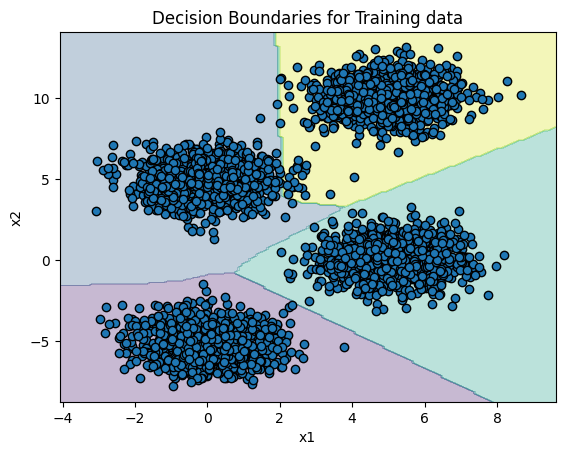

In [21]:
plot_decision_boundaries(X_train, Y_train,parameters, activation='relu',title='Decision Boundaries for Training data')

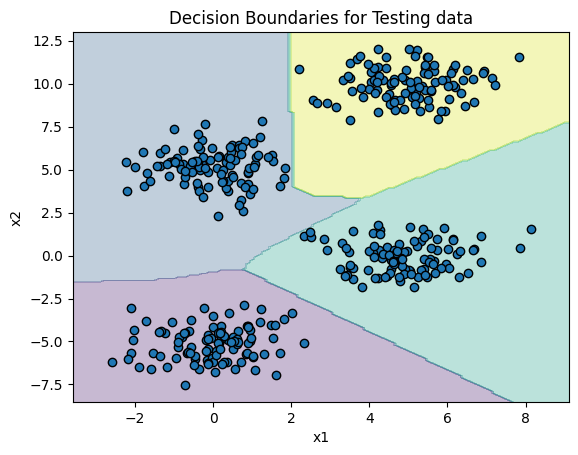

In [22]:
plot_decision_boundaries(X_test, Y_test,parameters, activation='relu',title='Decision Boundaries for Testing data')

## **Using Tensorflow** 

In [23]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential(
    [
        layers.Dense(8, activation="relu", name="hidden-layer-1",),
        layers.Dense(16, activation="relu", name="hidden-layer-2"),
        layers.Dense(4, activation='softmax',name="output-layer"),
    ]
)

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=METRICS)

In [24]:
X_train = X_train.T
y_train = Y_train.T
X_test = X_test.T
y_test  = Y_test.T

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
125/125 [==============================] - 2s 5ms/step - loss: 0.9387 - accuracy: 0.4908 - precision: 0.5427 - recall: 0.3240 - val_loss: 0.4927 - val_accuracy: 0.7350 - val_precision: 0.8116 - val_recall: 0.7000
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.9470 - precision: 0.9736 - recall: 0.9030 - val_loss: 0.1982 - val_accuracy: 0.9875 - val_precision: 0.9900 - val_recall: 0.9875
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.1380 - accuracy: 0.9855 - precision: 0.9874 - recall: 0.9800 - val_loss: 0.0950 - val_accuracy: 0.9900 - val_precision: 0.9900 - val_recall: 0.9900
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0790 - accuracy: 0.9862 - precision: 0.9875 - recall: 0.9845 - val_loss: 0.0611 - val_accuracy: 0.9900 - val_precision: 0.9900 - val_recall: 0.9900
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9865 - pr

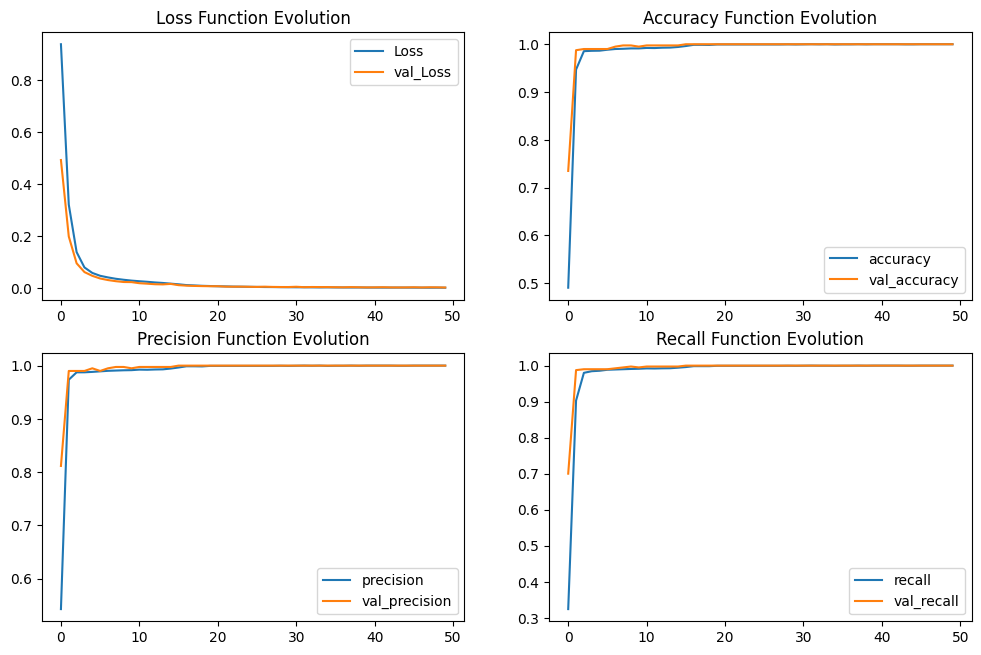

In [26]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [27]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predict_tr=model.predict(X_train) 
Y_predtr=np.argmax(predict_tr,axis=1)
Y_testtr=np.argmax(y_train,axis=1)
print("Training Accuracy : ",accuracy_score(Y_predtr, Y_testtr)*100)

predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)
Y_test=np.argmax(y_test,axis=1)
print("Testing Accuracy : ",accuracy_score(Y_pred, Y_test)*100)

Training Accuracy :  99.97500000000001
Testing Accuracy :  100.0


In [28]:
print("Confuison Matrix for Training Data :")
confusion_matrix(Y_predtr,Y_testtr)

Confuison Matrix for Training Data :


array([[1000,    0,    0,    0],
       [   0, 1000,    0,    1],
       [   0,    0, 1000,    0],
       [   0,    0,    0,  999]], dtype=int64)

In [29]:
print("Confuison Matrix for Testing Data :")
confusion_matrix(Y_pred,Y_test)

Confuison Matrix for Testing Data :


array([[100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0, 100,   0],
       [  0,   0,   0, 100]], dtype=int64)

## **Observations and Conclusions :**

* Successfully demonstrated working principle of Multi-layered Neural Network.
* I successfully implemented 4-layered Neural Network (input layer, two hidden layers, output layer) to perform 4-class classification task.
* I written code from scratch without using frameworks like Tensorflow and Pytorch.
* For comparision I trained model using Tensorflow.

| Model | Training  | Testing | 
|:----- |:---------|:--------:|
| Scratch |  99.45   |  100 | 
| Tensorflow |  99.97   |  100   | 
